In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [3]:
#loading data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape


(7043, 21)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

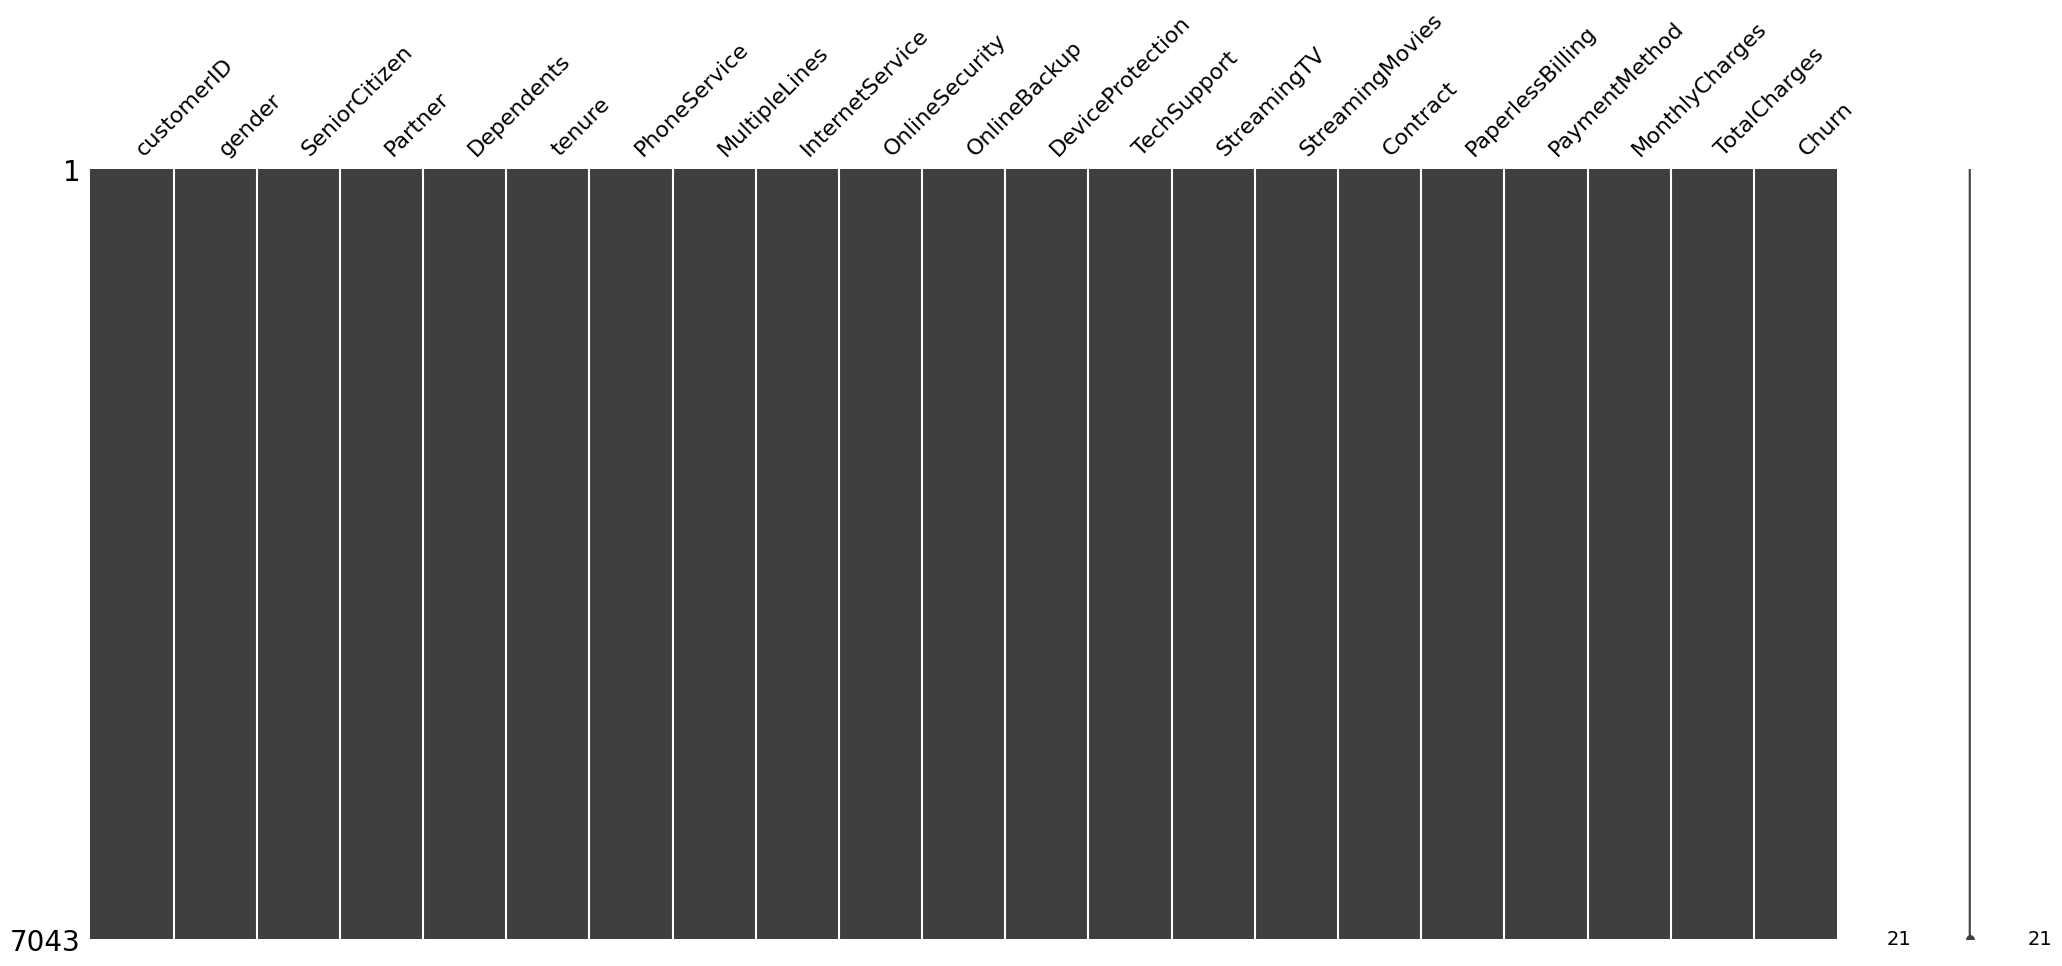

In [9]:
# Visualize missing values as a matrix
msno.matrix(df);


In [10]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [14]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [15]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [19]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [20]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [21]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

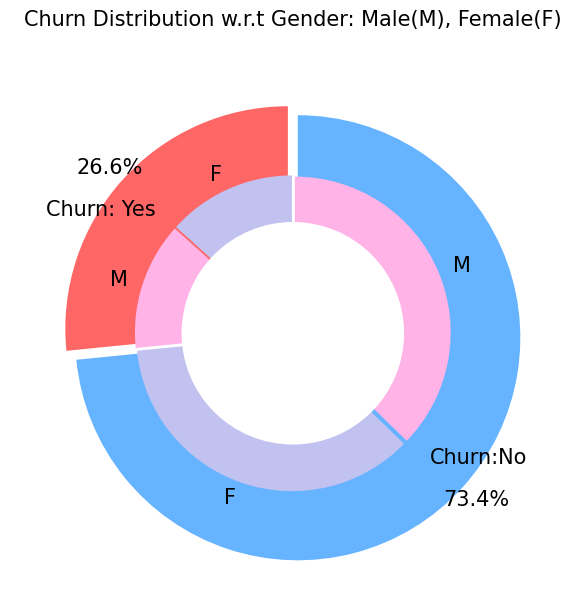

In [22]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot
plt.axis('equal')
plt.tight_layout()
plt.show()

In [23]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [24]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [25]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution by Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [26]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [27]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [28]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [29]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [30]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [32]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

In [33]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)

In [34]:
#Standardization
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Logistic Regression GridSearch (Commented because of saving time)

In [55]:


# # Define parameter distribution for Logistic Regression
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Types of regularization
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],           # Regularization strength
#     'solver': ['liblinear', 'saga'],               # Solvers compatible with penalty types
#     'max_iter': [100, 200, 500]                    # Number of iterations
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=LogisticRegression(random_state=42),
#     param_grid=param_grid,
#     cv=5,                    # 5-fold cross-validation
#     scoring='accuracy',
#     verbose=1,               # To display progress
#     n_jobs=-1                # Use all processors
# )

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Best parameters
# print("Best parameters for Logistic Regression:", grid_search.best_params_)

# # Initialize Logistic Regression with the best parameters
# lr_model = LogisticRegression(
#     penalty=grid_search.best_params_['penalty'],
#     C=grid_search.best_params_['C'],
#     solver=grid_search.best_params_['solver'],
#     max_iter=grid_search.best_params_['max_iter'],
#     random_state=42
# )

# # Train the Logistic Regression model
# lr_model.fit(X_train, y_train)

# # Predictions on the test set
# y_pred = lr_model.predict(X_test)

# # Evaluate the model
# from sklearn.metrics import accuracy_score, classification_report

# print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/Users/mahmutsezgin/Desktop/Customer-Churn-Prediction/venv-churn/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mahmutsezgin/Desktop/Customer-Churn-Prediction/venv-churn/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mahmutsezgin/Desktop/Customer-Churn-Prediction/venv-churn/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mahmutsezgin/Desktop/Customer-Churn-Prediction/venv-churn/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mahmutsezgin/Desktop/Customer-Churn-Prediction/venv-churn/lib/python3.13/site

Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of Logistic Regression: 0.7875059157595835
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1553
           1       0.62      0.53      0.57       560

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



Logistic Regression

In [36]:
#Logistic Regression
lr_model = LogisticRegression(C=0.1,max_iter=100,penalty='l2',solver='liblinear')
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)


Logistic Regression accuracy is : 0.8113744075829384


In [37]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



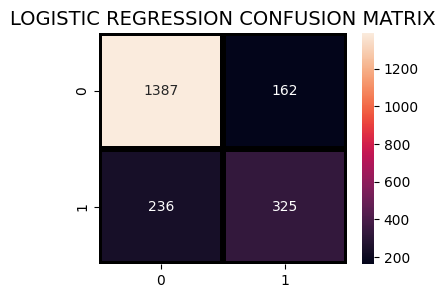

In [38]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

AdaBoost Grid & Randomized Search (Commented because of saving time)

In [57]:
# from sklearn.model_selection import RandomizedSearchCV


# # Define parameter distribution for RandomizedSearchCV
# param_dist_ada = {
#     'n_estimators': np.arange(50, 501, 50),  # Range of estimators (50 to 500, step 50)
#     'learning_rate': np.linspace(0.01, 1.0, 10),  # 10 values between 0.01 and 1.0
#     'algorithm': ['SAMME', 'SAMME.R']  # Boosting algorithms
# }

# # Initialize RandomizedSearchCV
# random_search_ada = RandomizedSearchCV(
#     estimator=AdaBoostClassifier(random_state=42),
#     param_distributions=param_dist_ada,
#     n_iter=20,  # Number of random combinations to try
#     cv=5,
#     scoring='accuracy',
#     verbose=1,
#     random_state=42,
#     n_jobs=-1  # Use all processors
# )

# # Fit RandomizedSearchCV
# random_search_ada.fit(X_train, y_train)

# # Best parameters and evaluation
# print("Best parameters for AdaBoost (RandomizedSearchCV):", random_search_ada.best_params_)
# best_ada_model_random = random_search_ada.best_estimator_

# # Predictions and evaluation
# ada_preds_random = best_ada_model_random.predict(X_test)
# print("Accuracy (RandomizedSearchCV):", accuracy_score(y_test, ada_preds_random))
# print("Classification Report (RandomizedSearchCV):")
# print(classification_report(y_test, ada_preds_random))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/mahmutsezgin/Desktop/Customer-Churn-Prediction/venv-churn/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/mahmutsezgin/Desktop/Customer-Churn-Prediction/venv-churn/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/mahmutsezgin/Desktop/Customer-Churn-Prediction/venv-churn/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/mahmutsezgin/Desktop/Customer-Churn-Prediction/venv-churn/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in

Best parameters for AdaBoost (RandomizedSearchCV): {'n_estimators': np.int64(300), 'learning_rate': np.float64(0.45), 'algorithm': 'SAMME'}
Accuracy (RandomizedSearchCV): 0.7946048272598202
Classification Report (RandomizedSearchCV):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1553
           1       0.64      0.53      0.58       560

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



In [56]:
# # Define parameter grid for GridSearchCV
# param_grid_ada = {
#     'n_estimators': [50, 100, 200, 300],   # Number of estimators
#     'learning_rate': [0.01, 0.1, 0.5, 1.0]  # Learning rate
# }

# # Initialize GridSearchCV
# grid_search_ada = GridSearchCV(
#     estimator=AdaBoostClassifier(random_state=42),
#     param_grid=param_grid_ada,
#     #cv=5,  # 5-fold cross-validation
#     scoring='accuracy',
#     verbose=1,
#     n_jobs=-1  # Use all processors
# )

# # Fit GridSearchCV
# grid_search_ada.fit(X_train, y_train)

# # Best parameters and evaluation
# print("Best parameters for AdaBoost (GridSearchCV):", grid_search_ada.best_params_)
# best_ada_model = grid_search_ada.best_estimator_

# # Predictions and evaluation
# ada_preds = best_ada_model.predict(X_test)
# print("Accuracy (GridSearchCV):", accuracy_score(y_test, ada_preds))
# print("Classification Report (GridSearchCV):")
# print(classification_report(y_test, ada_preds))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for AdaBoost (GridSearchCV): {'learning_rate': 0.5, 'n_estimators': 300}
Accuracy (GridSearchCV): 0.7946048272598202
Classification Report (GridSearchCV):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1553
           1       0.64      0.53      0.58       560

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



AdaBoost Classifier

In [41]:
# AdaBoost
ada_model = AdaBoostClassifier(learning_rate= 0.56, n_estimators= 350)
ada_model.fit(X_train,y_train)
ada_preds = ada_model.predict(X_test)

# Accuracy Score
print("AdaBoost Classifier accuracy:",metrics.accuracy_score(y_test, ada_preds))



AdaBoost Classifier accuracy: 0.8113744075829384


In [42]:
print(classification_report(y_test, ada_preds))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.68      0.55      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



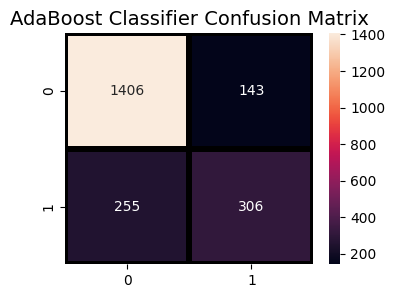

In [43]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, ada_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

SVC GridSearch (Commented because of saving time)

In [44]:
# param_grid_svc = {
#     'C': [0.1, 0.5, 1, 10, 100],
#     'kernel': ['rbf','poly','sigmoid'],
#     'gamma': ['scale', 'auto', 0.1, 1, 10]
# }

# # Initialize GridSearchCV for SVC
# grid_search_svc = GridSearchCV(
#     estimator=SVC(random_state=1),
#     param_grid=param_grid_svc,
#     cv=5,
#     scoring='accuracy',
#     verbose=1
# )

# # Fit GridSearchCV
# grid_search_svc.fit(X_train, y_train)

# # Best parameters and SVC accuracy
# print("Best parameters for SVC:", grid_search_svc.best_params_)
# svc_model = grid_search_svc.best_estimator_  # Retrieve the best model
# svc_accuracy = svc_model.score(X_test, y_test)
# print("SVC accuracy is:", svc_accuracy)



In [45]:
svc_model = SVC(C=0.5, gamma=0.1,random_state = 1,kernel='rbf')
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVC accuracy is :",accuracy_svc)


SVC accuracy is : 0.8061611374407583


In [46]:
print(classification_report(y_test, predict_y))


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.69      0.48      0.57       561

    accuracy                           0.81      2110
   macro avg       0.76      0.70      0.72      2110
weighted avg       0.80      0.81      0.79      2110




RANDOM Forest GridSearch (Commented because of saving time)

In [58]:
# # Define parameter distribution
# param_grid = {
#     'n_estimators': [10, 50, 100, 200, 500],
#     'max_leaf_nodes': [10, 30, 50, 100, 200],
#     'random_state': [42]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(),
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy'
# )

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Best parameters
# print("Best parameters:", grid_search.best_params_)


# # Initialize the Random Forest classifier with the best parameters
# rf_model = RandomForestClassifier(
#     n_estimators=grid_search.best_params_['n_estimators'],
#     max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'],
#     random_state=grid_search.best_params_['random_state'],
#     oob_score=True,
#     n_jobs=-1
# )

# # Train the model
# rf_model.fit(X_train, y_train)


Best parameters: {'max_leaf_nodes': 100, 'n_estimators': 200, 'random_state': 42}


RandomForestClassifier(max_leaf_nodes=100, n_estimators=200, n_jobs=-1,
                       oob_score=True, random_state=42)

Random Forest

In [48]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=200, max_leaf_nodes=100,random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=100, n_estimators=200, random_state=42)

In [49]:
y_pred = rf_model.predict(X_test)


In [50]:
# Print classification metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1425  124]
 [ 269  292]]

Accuracy Score:
0.8137440758293839

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.70      0.52      0.60       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



             Feature  Importance
4             tenure    0.170393
14          Contract    0.152569
18      TotalCharges    0.137489
17    MonthlyCharges    0.124101
8     OnlineSecurity    0.084433
11       TechSupport    0.080723
7    InternetService    0.055325
16     PaymentMethod    0.039448
9       OnlineBackup    0.028739
15  PaperlessBilling    0.020895
10  DeviceProtection    0.019908
6      MultipleLines    0.013050
13   StreamingMovies    0.012357
12       StreamingTV    0.012351
1      SeniorCitizen    0.012140
0             gender    0.011160
3         Dependents    0.010454
2            Partner    0.009127
5       PhoneService    0.005336


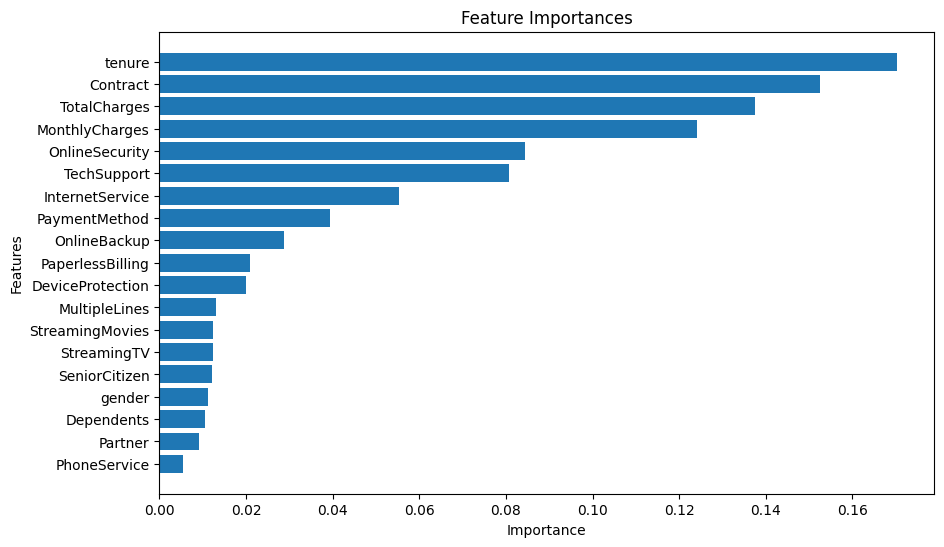

In [51]:
# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Visualization: Feature Importances Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To make the most important feature appear on top
plt.show()

Feature Selection

In [52]:
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df2 = pd.read_csv(file_path)

# Preview the first few rows
print(df2.head())

df2 = df2.drop(columns=['customerID'])  # Replace with the actual column name

# Step 1: Drop unnecessary columns

X = df2.drop(columns=['Churn', 'customerID'], errors='ignore')  # Drop 'Churn' and any identifier columns
y = df2['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Encode target column

# Step 2: Encode categorical features
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column])

# Step 3: Ensure there are no missing values
X = X.fillna(0)  # Fill any remaining NaN values with 0

# Step 4: Initialize Models
models = {
    'SVC': SVC(random_state=1),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier()
}

# Step 5: Test different values of `k` for SelectKBest
results = {}

# Loop over models
for model_name, model in models.items():
    print(f"Testing Model: {model_name}")
    model_results = []

    # Test different values of k (number of features)
    for k in range(1, X.shape[1] + 1):
        # Feature selection
        selector = SelectKBest(score_func=f_classif, k=k)
        X_selected = selector.fit_transform(X, y)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=40)

        # Train and evaluate the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        # Store results
        selected_columns = X.columns[selector.get_support()]
        model_results.append((k, acc, list(selected_columns)))

        print(f"k = {k}, Accuracy = {acc:.4f}, Selected Features: {len(selected_columns)}")

    # Find the best k for this model
    best_k, best_acc, best_features = max(model_results, key=lambda x: x[1])
    results[model_name] = {
        'best_k': best_k,
        'accuracy': best_acc,
        'selected_features': best_features
    }

    print(f"\nBest k for {model_name}: {best_k}, Accuracy: {best_acc:.4f}\n")

# Step 6: Print final results
print("Final Results:")
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"  Best k: {result['best_k']}")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  Selected Features: {result['selected_features']}\n")

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

RESULTS FOR FEATURE SELECTION

Final Results:
           Model  Best k  Accuracy  \
0            SVC      10    0.7842   
1  Random Forest      11    0.7809   
2       AdaBoost      15    0.7908   

                                   Selected Features  
0  [SeniorCitizen, Dependents, tenure, OnlineSecu...  
1  [SeniorCitizen, Partner, Dependents, tenure, O...  
2  [SeniorCitizen, Partner, Dependents, tenure, M...  


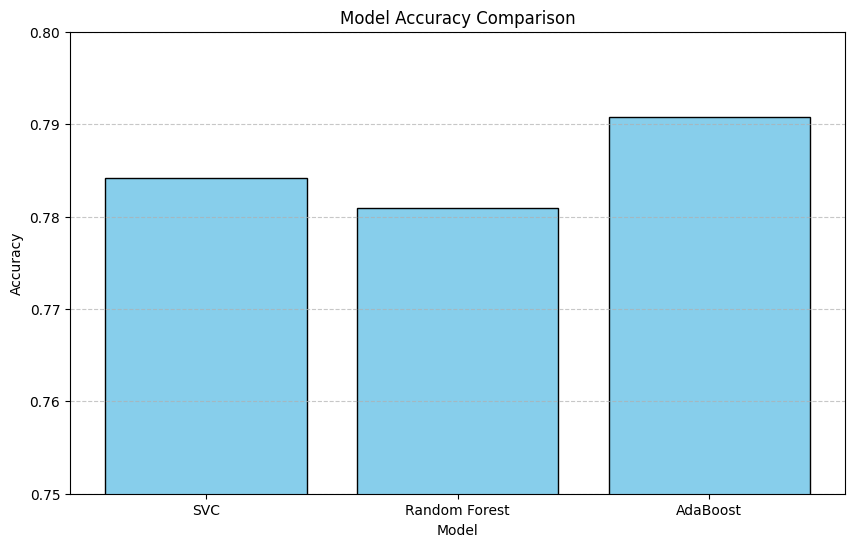

In [53]:
# Final results
results = {
    'Model': ['SVC', 'Random Forest', 'AdaBoost'],
    'Best k': [10, 11, 15],
    'Accuracy': [0.7842, 0.7809, 0.7908],
    'Selected Features': [
        ['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
         'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges'],
        ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
         'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges'],
        ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService',
         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies',
         'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']
    ]
}

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results as a table
print("Final Results:")
print(results_df)

# Plotting the Accuracy of each model
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue', edgecolor='black')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.75, 0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

RESULTS BEFORE FEATURE SELECTION

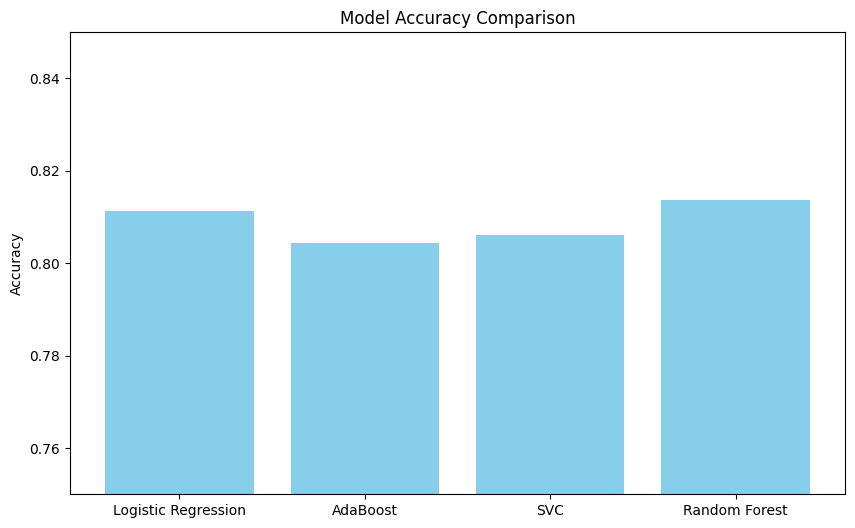

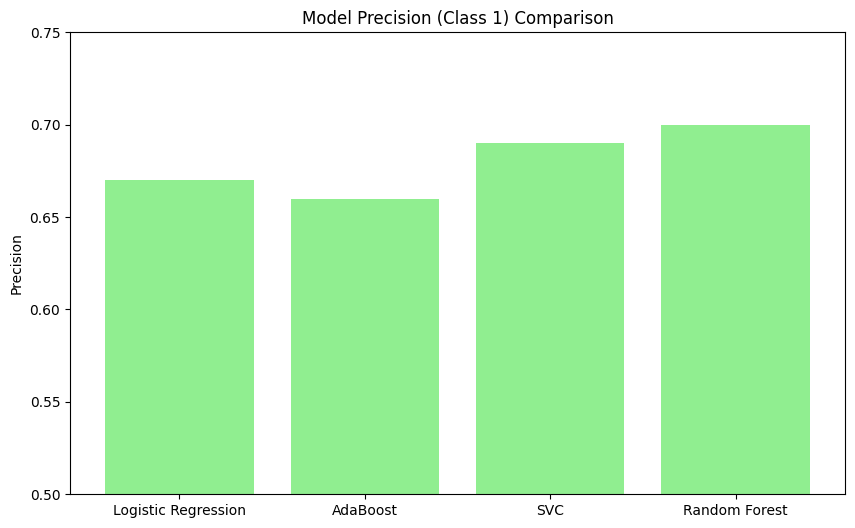

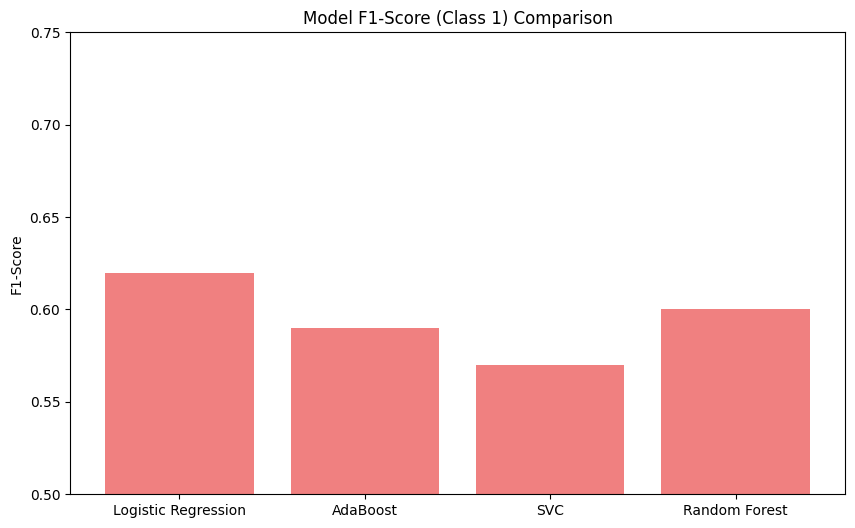

In [54]:
# Data preparation for visualization
models = ["Logistic Regression", "AdaBoost", "SVC", "Random Forest"]
accuracy = [0.8113, 0.8043, 0.8062, 0.8137]
precision_class1 = [0.67, 0.66, 0.69, 0.70]
f1_score_class1 = [0.62, 0.59, 0.57, 0.60]

# Plot Accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color="skyblue")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.75, 0.85)
plt.show()

# Plot Precision for Class 1
plt.figure(figsize=(10, 6))
plt.bar(models, precision_class1, color="lightgreen")
plt.title("Model Precision (Class 1) Comparison")
plt.ylabel("Precision")
plt.ylim(0.5, 0.75)
plt.show()

# Plot F1-Score for Class 1
plt.figure(figsize=(10, 6))
plt.bar(models, f1_score_class1, color="lightcoral")
plt.title("Model F1-Score (Class 1) Comparison")
plt.ylabel("F1-Score")
plt.ylim(0.5, 0.75)
plt.show()
